In [12]:
import pandas as pd
app = pd.read_csv('w1_applestore.csv')
app.head()

,Unnamed: 0,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang
0,0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10
1,1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9
4,4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45


In [13]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 11 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
user_rating         7197 non-null float64
prime_genre         7197 non-null object
sup_devices         7197 non-null int64
ipadSc_urls         7197 non-null int64
lang                7197 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 618.6+ KB


In [14]:
# Drop the column "Unnamed: 0"
app.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
# Describe the data
app.describe()

,id,size_bytes,price,rating_count_tot,user_rating,sup_devices,ipadSc_urls,lang
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,37.361817,3.707100,5.434903
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,3.737715,1.986005,7.919593
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,9.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,37.000000,3.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,37.000000,5.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,38.000000,5.000000,8.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,47.000000,5.000000,75.000000


In [16]:
# Convert size_bytes to mb
app['size_mb'] = app['size_bytes']/ (1024 * 1024)

In [17]:
app.size_mb.describe()

count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_mb, dtype: float64

In [18]:
# Add lables to price
app['paid'] = app['price'].apply(lambda x:1 if x > 0 else 0)

In [19]:
app.paid.describe()

count    7197.000000
mean        0.436432
std         0.495977
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: paid, dtype: float64

In [21]:
app.price.value_counts()

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: price, dtype: int64

In [22]:
# Delete apps with prices higher than 49.99
app=app[app['price']<=49.99]

In [24]:
# Grouping the apps with prices
bins = [0,2,10,300]
labels = ['<2','<10','<300']
app['price_new'] = pd.cut(app.price, bins, right = False, labels = labels)

In [25]:
# Observe app prices in different price groups 
app.groupby(['price_new'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_new,,,,,,,,
<2,5405.0,0.361981,0.675318,0.00,0.00,0.00,0.00,1.99
<10,1695.0,4.565811,1.864034,2.99,2.99,3.99,4.99,9.99
<300,90.0,20.256667,8.245939,11.99,14.99,17.99,23.99,49.99


In [26]:
# Observe app prices in different categories of apps
app.groupby(['prime_genre'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,112.0,1.790536,3.342210,0.0,0.0,0.00,2.99,27.99
Business,56.0,4.136429,7.154403,0.0,0.0,2.99,4.99,49.99
Catalogs,10.0,0.799000,2.526660,0.0,0.0,0.00,0.00,7.99
Education,449.0,2.572004,2.669539,0.0,0.0,2.99,2.99,24.99
Entertainment,535.0,0.889701,1.454022,0.0,0.0,0.00,1.99,9.99
Finance,104.0,0.421154,1.108990,0.0,0.0,0.00,0.00,5.99
Food & Drink,63.0,1.552381,3.972119,0.0,0.0,0.00,1.49,27.99
Games,3862.0,1.432923,2.486609,0.0,0.0,0.00,1.99,29.99
Health & Fitness,180.0,1.916444,2.052378,0.0,0.0,1.99,2.99,9.99


In [27]:
# Observe rating counts
app.rating_count_tot.describe()

count    7.190000e+03
mean     1.290515e+04
std      7.577526e+04
min      0.000000e+00
25%      2.725000e+01
50%      3.005000e+02
75%      2.796750e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64

In [28]:
# Grouping rating counts
bins = [0,1000,5000,100000,5000000]
app['rating_new']=pd.cut(app.rating_count_tot, bins, right = False)

In [29]:
app.groupby(app['rating_new'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_new,,,,,,,,
"[0, 1000)",4587.0,1.798696,3.324682,0.0,0.0,0.0,2.99,49.99
"[1000, 5000)",1193.0,1.740721,3.203853,0.0,0.0,0.0,2.99,39.99
"[5000, 100000)",1192.0,0.963549,1.984895,0.0,0.0,0.0,0.99,14.99
"[100000, 5000000)",218.0,0.196376,0.925160,0.0,0.0,0.0,0.00,7.99


<Figure size 1440x2160 with 0 Axes>

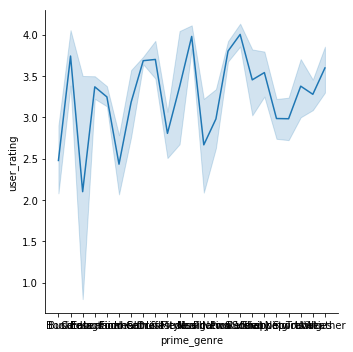

In [39]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,30))
sns.relplot(x = "prime_genre", y = "user_rating", kind = "line", 
           data = app)

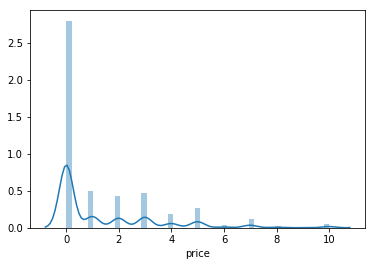

In [41]:
# Price distribution
app1=app[app['price']<=9.99]
sns.distplot(app1['price'])

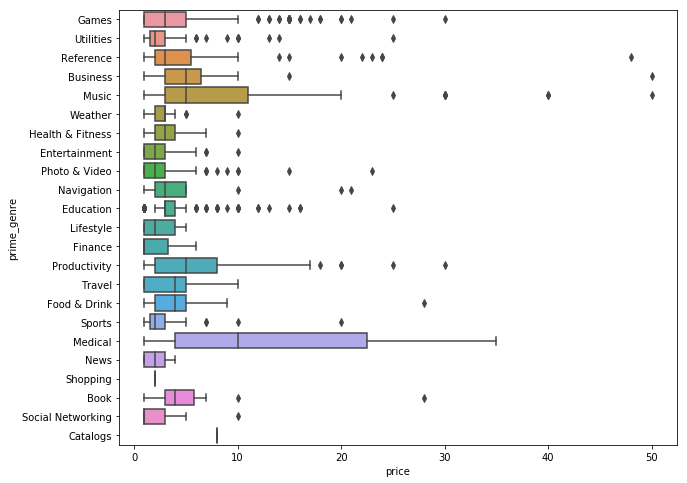

In [43]:
# Show the price distribution of paid apps based on genres
plt.figure(figsize = (10,8))
sns.boxplot(x = "price", y = "prime_genre", data = app[app['paid']==1])

# The prices of most apps are within 9.99. Medical apps' price is higher than other genres'. 

In [48]:
app.prime_genre.value_counts()

Games                3862
Entertainment         535
Education             449
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          177
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               56
Navigation             45
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [52]:
# Keep the top 5 genres
top5= ['Games','Entertainment', 'Education', 'Photo & Video',
       'Utilities']
app5 = app[app.prime_genre.isin(top5)]

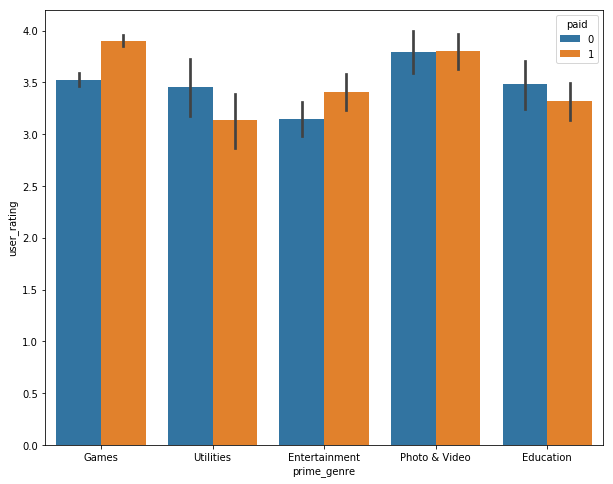

In [53]:
# Means for top5 apps
# Compare paid and free apps
plt.figure(figsize=(10,8))
sns.barplot(x='prime_genre',y='user_rating',hue='paid',data=app5)

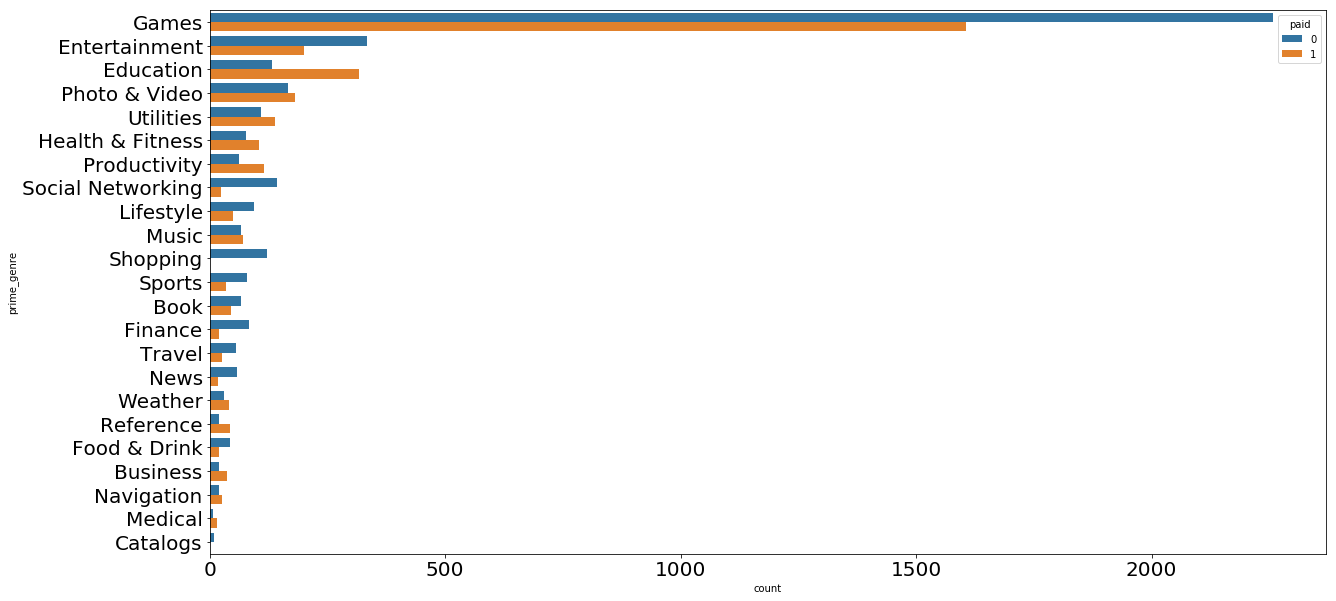

In [56]:
# What are the genres for most of the paid and free apps? 
plt.figure(figsize=(20,10))
sns.countplot(y='prime_genre',hue='paid',data=app,order=app['prime_genre'].value_counts().index)
plt.tick_params(labelsize=20)

In [57]:
# Count of apps in different rating levels 
bins = [0,0.1,2.5,4.5,5]
app['rating_level']=pd.cut(app.user_rating,bins,right=False)

In [58]:
app.groupby(['rating_level'])['user_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_level,,,,,,,,
"[0.0, 0.1)",929.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
"[0.1, 2.5)",206.0,1.650485,0.400213,1.0,1.5,2.0,2.0,2.0
"[2.5, 4.5)",2903.0,3.646056,0.467987,2.5,3.5,4.0,4.0,4.0
"[4.5, 5.0)",2660.0,4.500000,0.000000,4.5,4.5,4.5,4.5,4.5


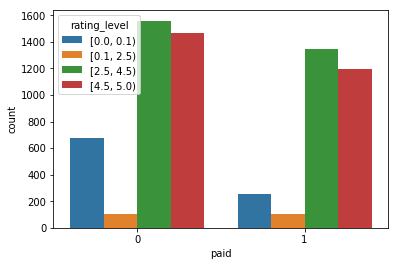

In [60]:
# Count of paid and free apps in different rating levels
sns.countplot(x='paid',hue='rating_level',data=app)

In [64]:
# Does the rating related to the size of apps? 
q4=['user_rating','price','size_mb']
app[q4].corr()

,user_rating,price,size_mb
user_rating,1.000000,0.073237,0.066160
price,0.073237,1.000000,0.314386
size_mb,0.066160,0.314386,1.000000


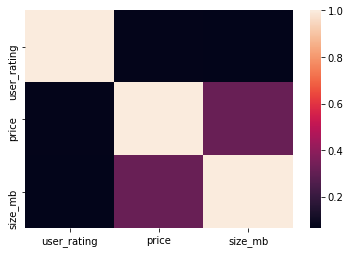

In [65]:
sns.heatmap(app[q4].corr())